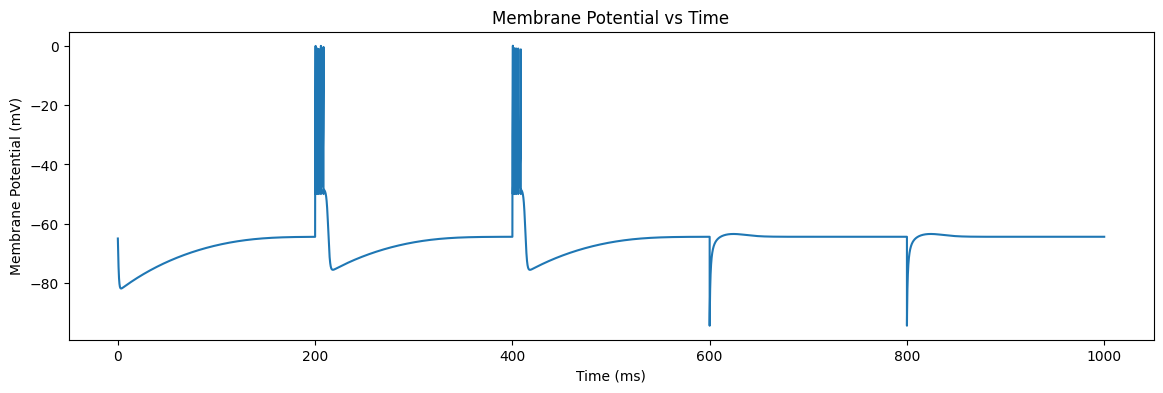

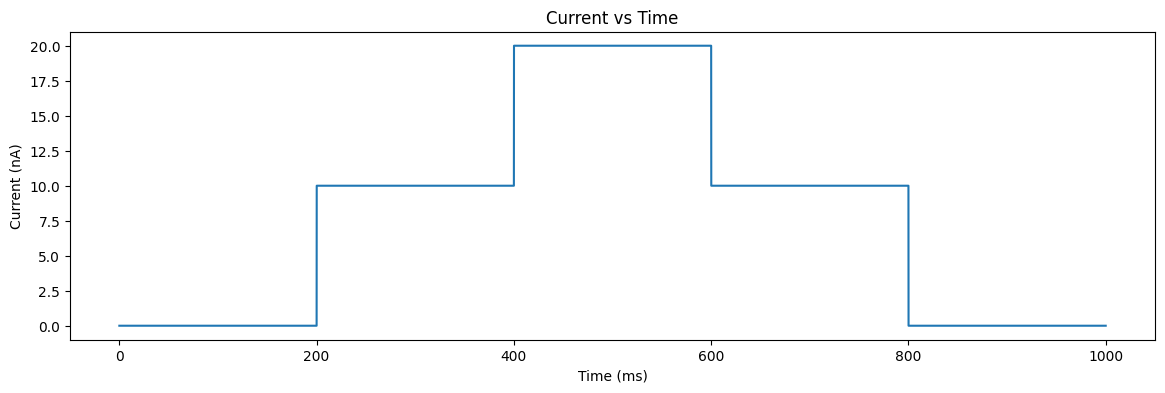

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ====== MODEL PARAMETERS ====== #
#   - a, b, c, and d are neuron parameters (Izhikevich model)
#   - v_th is the threshold voltage
#   - Cm is the membrane capacitance
#   - K_x is a gain factor
#   - I is the initial current
# ============================== #
def InitializeNeuron(neuron_type, neuron_response):
    if neuron_response == 0:
        return {
            'a': 0.025,
            'b': 0.2,
            'c': -65,
            'd': 6,
            'v_th': 0.03,
            'Cm': 1,
            'K_one': 0.7,
            'K_two': 3,
            'neuron_type': neuron_type
        }
    else:
        return {
            'a': 0.02,
            'b': 0.25,
            'c': -50,
            'd': 1.5,
            'v_th': 0.03,
            'Cm': 1,
            'K_one': 0.7,
            'K_two': 3,
            'neuron_type': neuron_type
        }

# ====== MODEL EQUATIONS ====== #
#   - dv and du are the differential equations for the membrane potential and recovery variable
#   - Use Euler's method to update the state of the neuron
# ============================= #
def UpdateNeuronState(parameters, v, u, t, dt, I):
    a, b, c, d, v_th, Cm, K_one, K_two, neuron_type = parameters.values()

    for i in range(4):
        if i < 2:
            I[i * 20000:(i + 1) * 20000] = i * 10
        else:
            I[i * 20000:(i + 1) * 20000] = (i - 4) * -10

    if neuron_type == 0:
        dv = (0.04 * v[t]**2) + (5 * v[t]) + 140 - u[t] + (K_one / Cm) * I[t]
        du = a * (b * v[t] - u[t])

        if v[t] > v_th:
            v[t] = c
            u[t] += d

        u[t+1] = u[t] + dt * du
        v[t+1] = v[t] + dt * dv

    else:
        dv = (0.04 * v[t]**2) + (5 * v[t]) + 140 - u[t]
        du = a * (b * v[t] - u[t])

        if v[t] > v_th:
            v[t] = c
            u[t] += d

        u[t+1] = u[t] + dt * du
        v[t+1] = v[t] + dt * dv + (K_two / Cm) * (I[t + 1] - I[t])

# ====== PLOT RESULTS ====== #
#   - Membrane Potential vs Time plots the membrane potential over 1000 ms
#   - Add plot for recovery variable
#   - Add plot for firing rate vs current
# ========================== #
def PlotNeuronResults(time, v, I):
    plt.figure(figsize=(14, 4))
    plt.plot(time, v)
    plt.title('Membrane Potential vs Time')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.show()

    plt.figure(figsize=(14, 4))
    plt.plot(time, I)
    plt.title('Current vs Time')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current (nA)')
    plt.show()

    # plt.plot(time, u)
    # plt.title('Recovery Variable vs Time')
    # plt.xlabel('Time (ms)')
    # plt.ylabel('Recovery Variable')
    # plt.show()

    # plt.figure(figsize=(10, 5))
    # plt.title('Firing Rate vs Current')
    # plt.xlabel('Current (nA)')
    # plt.ylabel('Firing Rate (Hz)')
    # plt.show()

# ====== SIMULATE NEURON ====== #
#   - Given the type of neuron and parameters, simulate the neuron over 1000 ms
#   - Initialize the membrane potential and recovery variable at t = 0
#   - Return the time and membrane potential
# ============================ #
def NeuronSimulate(parameters, dt, total_time, I):
    num_steps = int(total_time / dt)

    v = np.zeros(num_steps)
    u = np.zeros(num_steps)
    time = np.linspace(0, total_time, num_steps)

    v[0] = -65
    u[0] = 0

    for t in range(num_steps - 1):
        UpdateNeuronState(parameters, v, u, t, dt, I)

    return time, v

# ====== MAIN ====== #
#   - Contains all functions of the model
#   - Initialize the neuron type (Spiking = 0, Bursting = 1)
#   - Simulate the neuron
#   - Plot the results
# ================== #
def main():
    # Neuron type (SA-1 = 0, FA-1 = 1)
    neuron_type = 1
    # Neuron response (Spiking = 0, Bursting = 1)
    neuron_response = 1

    I = np.zeros(100000)

    parameters = InitializeNeuron(neuron_type, neuron_response)
    dt = 0.01
    total_time = 1000
    time, v = NeuronSimulate(parameters, dt, total_time, I)
    PlotNeuronResults(time, v, I)

if __name__ == "__main__":
    main()

